In [1]:
import cv2
import matplotlib.pyplot as plt
from keras.applications.densenet import preprocess_input
%matplotlib inline

Using TensorFlow backend.


In [2]:
img_size = 256

In [3]:
def resize_to_square(im):
    old_size = im.shape[:2]
    ratio = float(img_size)/min(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))

    center_x = im.shape[1] // 2
    center_y = im.shape[0] // 2
    half_size = img_size // 2
    new_im = im[center_y-half_size:center_y+half_size, center_x-half_size:center_x+half_size]
    
    return new_im

In [7]:
def load_image_augmented(path):
    image = cv2.imread('{}'.format(path))
    new_image = resize_to_square(image)
    new_image = preprocess_input(new_image, mode='torch')
    return new_image

In [8]:
g = load_image_augmented('../input/petfinder-adoption-prediction/train_images/0aba238d7-1.jpg')

TypeError: preprocess_input() got multiple values for keyword argument 'mode'

In [9]:
g[0]

array([[-1.4329139 , -2.03571415, -1.52557731],
       [-1.82678318, -2.00070024, -1.57786489],
       [-2.10077929, -1.86064422, -1.66501093],
       [-2.11790395, -1.80812323, -1.76958609],
       [-1.96378124, -1.84313726, -1.80444443],
       [-1.79253364, -1.94817924, -1.7870152 ],
       [-1.94665647, -1.98319328, -1.69986928],
       [-2.10077929, -1.94817924, -1.54300654],
       [-2.10077929, -2.01820731, -1.47328973],
       [-1.87815738, -2.03571415, -1.49071896],
       [-1.63841093, -2.03571415, -1.56043577],
       [-1.74115944, -2.01820731, -1.71729851],
       [-2.0836544 , -1.86064422, -1.7870152 ],
       [-2.0836544 , -1.82563019, -1.76958609],
       [-2.03228021, -1.91316521, -1.69986928],
       [-2.04940486, -1.93067217, -1.71729851],
       [-2.06652975, -1.94817924, -1.71729851],
       [-2.04940486, -1.91316521, -1.68244004],
       [-2.04940486, -1.91316521, -1.6475817 ],
       [-2.06652975, -1.93067217, -1.6475817 ],
       [-2.0836544 , -1.94817924, -1.630

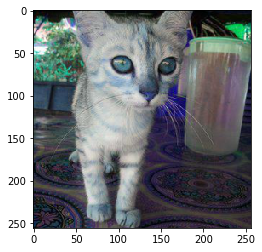

In [33]:
g = load_image_augmented('../input/petfinder-adoption-prediction/train_images/0aba238d7-1.jpg')
plt.imshow(g)

In [34]:
gray = cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)

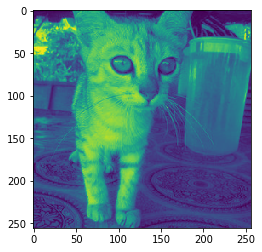

In [35]:
plt.imshow(gray)

In [39]:
detector = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
rects = detector.detectMultiScale(gray, scaleFactor=1.1,
minNeighbors=1, minSize=(30, 30))

In [40]:
image =g

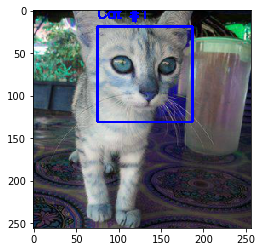

In [41]:
# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# show the detected cat faces
# cv2.imshow("Cat Faces", image)
# cv2.waitKey(0)
plt.imshow(image)


# # loop over the cat faces and draw a rectangle surrounding each
# for (i, (x, y, w, h)) in enumerate(rects):
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
#     cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10),
#         cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
 
# # show the detected cat faces
# cv2.imshow("Cat Faces", image)
# cv2.waitKey(0)